In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sqlalchemy import create_engine
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from matplotlib import rcParams
%matplotlib inline

## Reading and Understanding the data

In [2]:
data = pd.read_csv('general_data.csv')
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

# Cleaning the Data

### As the data seems mostly in correct data type format , Hence this needs no change

In [4]:
#Check for na or NULL
print(data.isna().sum(), data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64 Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                 

In [5]:
#Dropping null value columns
data=data.drop(columns=['NumCompaniesWorked','TotalWorkingYears'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4410 non-null   int64 
 1   Attrition                4410 non-null   object
 2   BusinessTravel           4410 non-null   object
 3   Department               4410 non-null   object
 4   DistanceFromHome         4410 non-null   int64 
 5   Education                4410 non-null   int64 
 6   EducationField           4410 non-null   object
 7   EmployeeCount            4410 non-null   int64 
 8   EmployeeID               4410 non-null   int64 
 9   Gender                   4410 non-null   object
 10  JobLevel                 4410 non-null   int64 
 11  JobRole                  4410 non-null   object
 12  MaritalStatus            4410 non-null   object
 13  MonthlyIncome            4410 non-null   int64 
 14  Over18                   4410 non-null  

In [6]:
#Checking null values after dropping the NUll valued columns

data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [7]:
# Find and Delete Duplicate rows - No Dulicate rows found
data.duplicated().sum()

0

## data encoding

In [8]:
enc = LabelEncoder()
#List of varibales that need to be endocded... EmployeeID,YearsAtCompany ,YearsSinceLastPromotion ,YearsWithCurrManager 
#doesnt need to be coded as the data is already unique
CatVarList = ['Attrition','BusinessTravel','Department','DistanceFromHome','EducationField','Gender',
             'EmployeeCount','JobRole','MaritalStatus','Over18']
             
for i in CatVarList:
    data[[i]] = enc.fit_transform(data[[i]])

# EmployeeId. is like id column So can be removed.
data.drop('EmployeeID', inplace=True, axis=1)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      4410 non-null   int64
 1   Attrition                4410 non-null   int32
 2   BusinessTravel           4410 non-null   int32
 3   Department               4410 non-null   int32
 4   DistanceFromHome         4410 non-null   int64
 5   Education                4410 non-null   int64
 6   EducationField           4410 non-null   int32
 7   EmployeeCount            4410 non-null   int64
 8   Gender                   4410 non-null   int32
 9   JobLevel                 4410 non-null   int64
 10  JobRole                  4410 non-null   int32
 11  MaritalStatus            4410 non-null   int32
 12  MonthlyIncome            4410 non-null   int64
 13  Over18                   4410 non-null   int32
 14  PercentSalaryHike        4410 non-null   int64
 15  Stan

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## EDA-Exploratory Data Analyis

In [9]:
#categorise variables
CatVarList = ['Attrition', 'Department', 'MonthlyIncome', 'YearsAtCompany']
ConVarList = ['Age', 'BusinessTravel', 'DistanceFromHome', 'Education',
              'EducationField', 'EmployeeCount', 'Gender',
              'JobRole', 'MaritalStatus',
              'Over18', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear','YearsSinceLastPromotion','YearsWithCurrManager']
OutValList = ['y_Att']

## Checking normality of variables to undertand the requirement of transforming the variables

In [10]:
# Check distribution of continous variables - All values between + and -1, establishes reasonable normality
ConVarStats = data[ConVarList].agg(['skew','kurtosis','std','mean','min','median','max'])
print(ConVarStats)

                Age  BusinessTravel  DistanceFromHome  Education  \
skew       0.413005       -1.438026          0.957466  -0.289484   
kurtosis  -0.405951        0.698371         -0.227045  -0.560569   
std        9.133301        0.665304          8.105026   1.023933   
mean      36.923810        1.607483          8.192517   2.912925   
min       18.000000        0.000000          0.000000   1.000000   
median    36.000000        2.000000          6.000000   3.000000   
max       60.000000        2.000000         28.000000   5.000000   

          EducationField  EmployeeCount    Gender   JobRole  MaritalStatus  \
skew            0.549997            0.0 -0.408387 -0.357027      -0.152071   
kurtosis       -0.689242            0.0 -1.834052 -1.192752      -1.115231   
std             1.331067            0.0  0.489954  2.461263       0.729955   
mean            2.247619            0.0  0.600000  4.458503       1.097279   
min             0.000000            0.0  0.000000  0.000000      

In [11]:
# The P value > 0 for the varible to be normal. Some varibale are not normal. We can look at 
#log transforming those varibales before being fed into the algorithms

from scipy import stats
NormailityStat = pd.DataFrame()
for i in ConVarList:
    print(i,stats.shapiro(data[[i]]))

Age (0.9775103330612183, 7.460528135313696e-26)
BusinessTravel (0.6125991344451904, 0.0)
DistanceFromHome (0.8616392016410828, 0.0)
Education (0.8954876661300659, 0.0)
EducationField (0.8480035066604614, 0.0)
EmployeeCount (1.0, 1.0)
Gender (0.6219616532325745, 0.0)
JobRole (0.9019578099250793, 0.0)
MaritalStatus (0.8064092993736267, 0.0)
Over18 (1.0, 1.0)
StandardHours (1.0, 1.0)
StockOptionLevel (0.7895994186401367, 0.0)
TrainingTimesLastYear (0.8951788544654846, 0.0)
YearsSinceLastPromotion (0.7037764191627502, 0.0)
YearsWithCurrManager (0.8974733352661133, 0.0)


C:\Users\user\anaconda3\lib\site-packages\scipy\stats\morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


# BOX Plot of all variables to analyse possibility of scaling

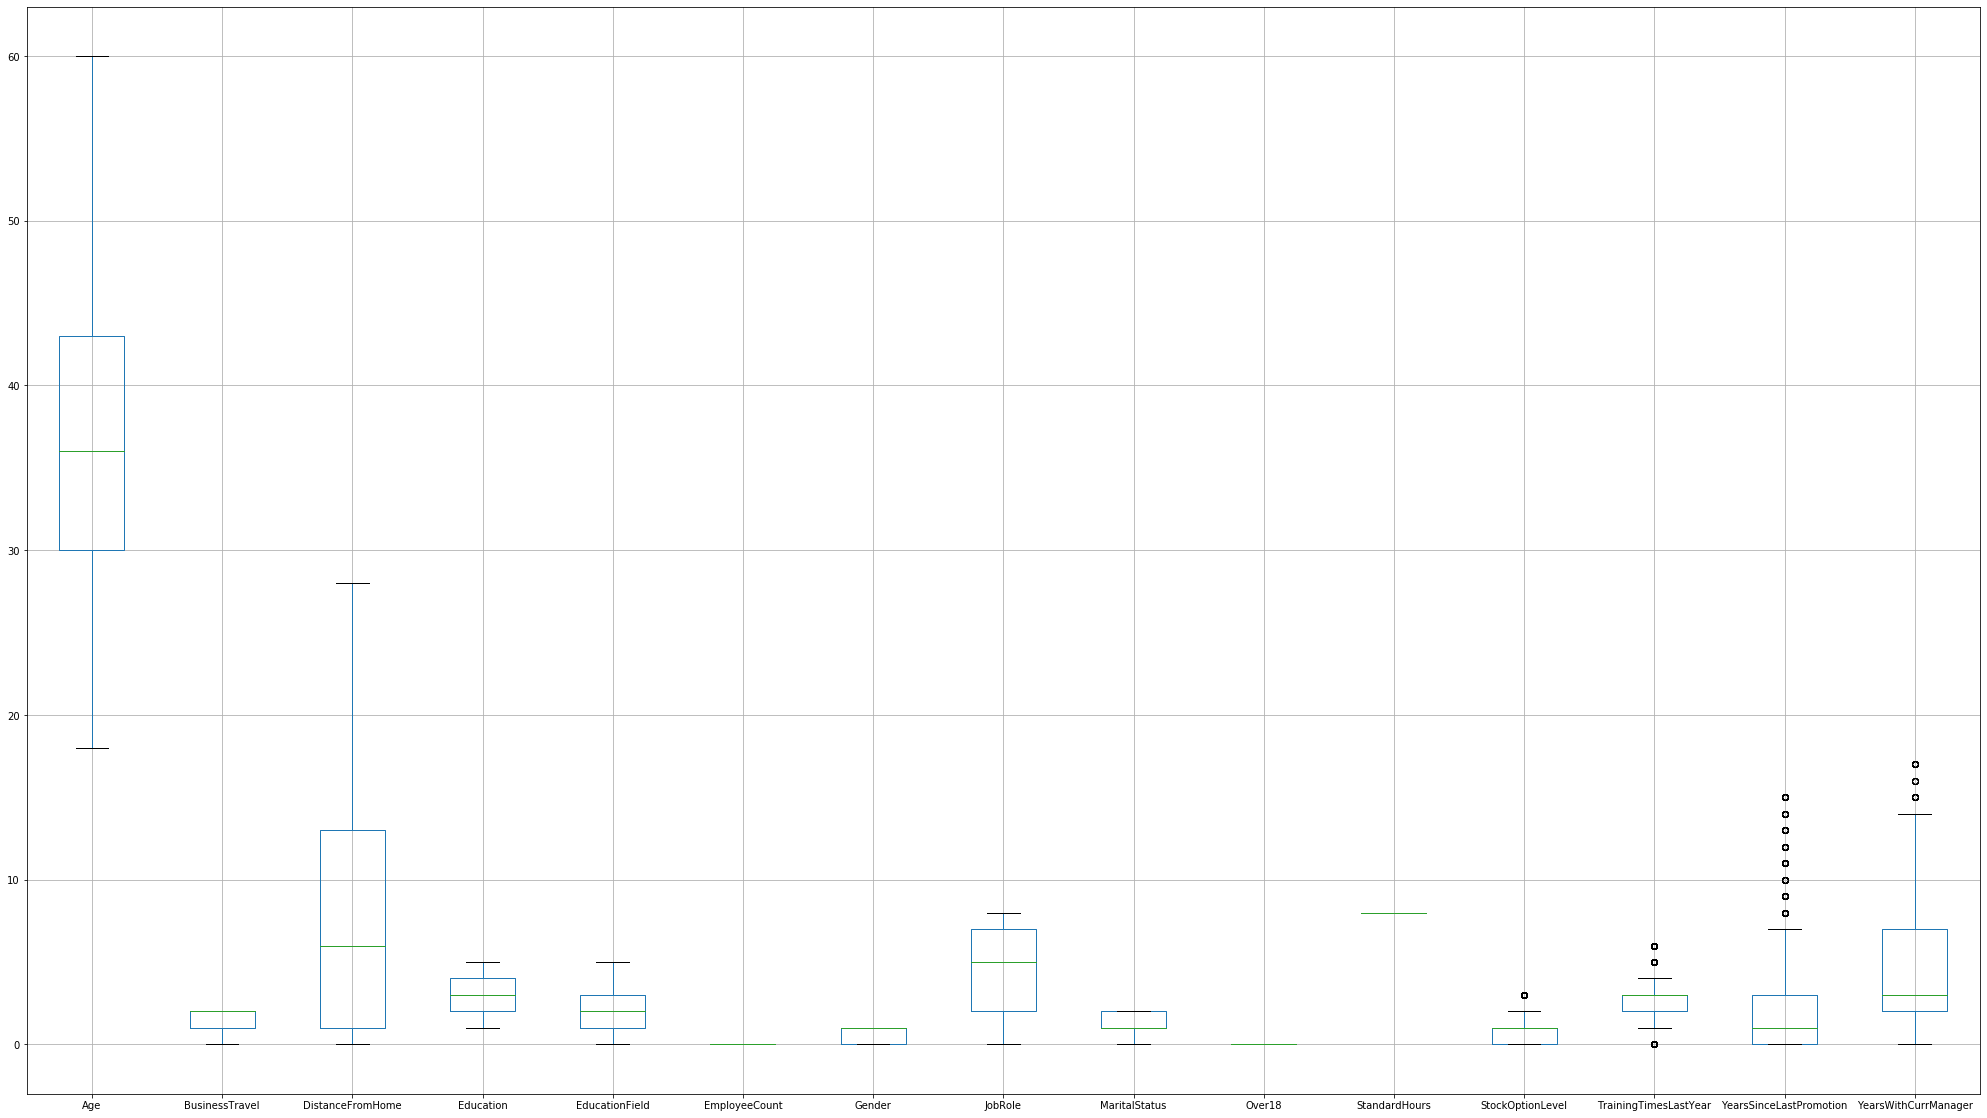

In [12]:
# the magnitude of variations between varibales is  huge. So a fit case for scaling of variables. TBD later
rcParams['figure.figsize'] =35,20
data[ConVarList].boxplot()

## Basic Pie chart of outcome variable (Attrition)

In [13]:
data.Attrition.value_counts()


0    3699
1     711
Name: Attrition, dtype: int64

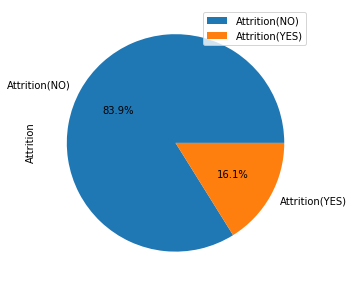

In [14]:
rcParams['figure.figsize'] =10,5
data.Attrition.value_counts(sort=False).plot.pie(labels=["Attrition(NO)","Attrition(YES)"],legend = True, autopct='%1.1f%%',shadow=False)
plt.show()

# So now we have to Analyse why this 16.1% of employees left the organisation

### To Understand this we have to perform feature wise analysis with respect to the Attrition

#  BusinessTravel vs Attrition

In [15]:
data.BusinessTravel.value_counts()

2    3129
1     831
0     450
Name: BusinessTravel, dtype: int64

Attrition             0        1
BusinessTravel                  
0               11.1922   5.0633
1               16.8694  29.1139
2               71.9384  65.8228


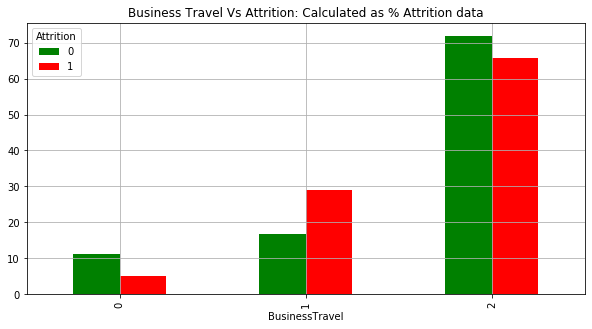

In [16]:
#Here 29.11 % of employees travel frequently where there attrition rate is high
Crosstab_Area = pd.crosstab(data.BusinessTravel, data.Attrition,normalize = 'columns').round(6)*100
print(Crosstab_Area)
Crosstab_Area.plot(kind='bar', stacked=False, color=['green','red'], grid=True,title="Business Travel Vs Attrition: Calculated as % Attrition data")


#  Distance from home vs Attrition

In [17]:
data.DistanceFromHome.value_counts()

1     633
0     624
9     258
8     255
2     252
6     252
7     240
4     195
3     192
5     177
15     96
10     87
23     84
22     81
28     81
14     78
17     78
24     75
25     75
19     75
27     69
18     66
13     63
16     60
11     60
21     57
12     57
20     54
26     36
Name: DistanceFromHome, dtype: int64

Attrition            0     1
DistanceFromHome            
0                 14.0  14.0
1                 14.0  16.0
2                  6.0   4.0
3                  4.0   5.0
4                  4.0   4.0
5                  4.0   3.0
6                  6.0   7.0
7                  6.0   5.0
8                  6.0   5.0
9                  5.0   8.0
10                 2.0   1.0
11                 1.0   2.0
12                 1.0   0.0
13                 2.0   0.0
14                 1.0   5.0
15                 2.0   2.0
16                 1.0   2.0
17                 2.0   2.0
18                 1.0   3.0
19                 2.0   1.0
20                 1.0   1.0
21                 1.0   1.0
22                 2.0   2.0
23                 2.0   1.0
24                 2.0   1.0
25                 2.0   0.0
26                 1.0   1.0
27                 2.0   2.0
28                 2.0   2.0


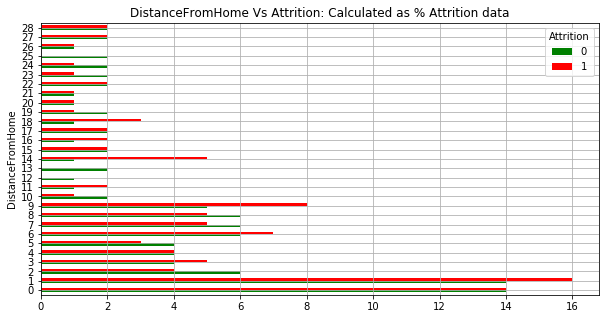

In [18]:
#here even if the distance from home is 2(units) , still the attrition rate is high , Distance has a variable relationship with the attrition %
Crosstab_Area = pd.crosstab(data.DistanceFromHome, data.Attrition,normalize = 'columns').round(2)*100
print(Crosstab_Area)
Crosstab_Area.plot(kind='barh', stacked=False, color=['green','red'], grid=True,title="DistanceFromHome Vs Attrition: Calculated as % Attrition data")


# Education vs Attrition

In [19]:
data.Education.value_counts()

3    1716
4    1194
2     846
1     510
5     144
Name: Education, dtype: int64

Attrition        0        1
Education                  
1          11.6788  10.9705
2          18.5726  22.3629
3          39.1727  37.5527
4          27.2506  26.1603
5           3.3252   2.9536


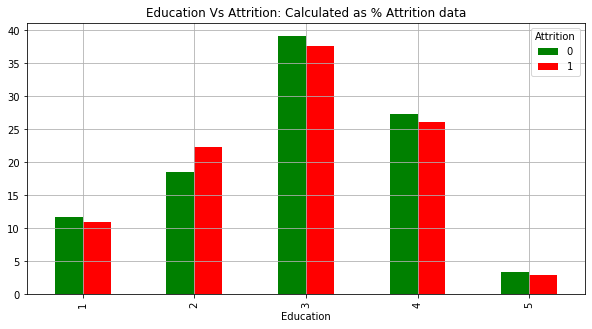

In [20]:
#Here as compared with the type (2)education with 846 employees , Attrition rate is more than people retaining the orgnanisation, Here the organisation should work 
#in understanding the technology gap and bridge it to retain employees

Crosstab_Area = pd.crosstab(data.Education, data.Attrition,normalize = 'columns').round(6)*100
print(Crosstab_Area)
Crosstab_Area.plot(kind='bar', stacked=False, color=['green','red'], grid=True,title="Education Vs Attrition: Calculated as % Attrition data")


# MaritalStatus vs Attrition

Attrition            0        1
MaritalStatus                  
0              23.8443  13.9241
1              47.7697  35.4430
2              28.3861  50.6329


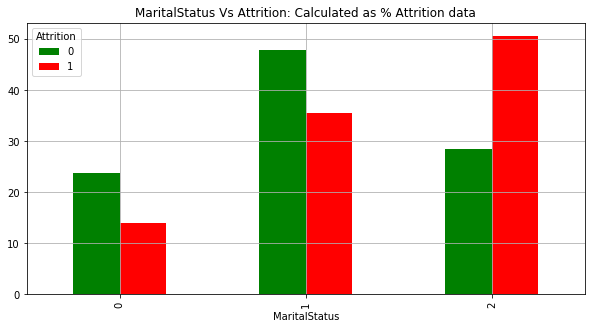

In [21]:
#Here almost 50 % of employees who left/got fired from the company were having marital status as 'single'
#Now we have to futher analyse down the EDA that is it because of better career options /technology or any other factor based on the data we have
Crosstab_Area = pd.crosstab(data.MaritalStatus, data.Attrition,normalize = 'columns').round(6)*100
print(Crosstab_Area)
Crosstab_Area.plot(kind='bar', stacked=False, color=['green','red'], grid=True,title="MaritalStatus Vs Attrition: Calculated as % Attrition data")


# MonthlyIncome vs Attrition

In [22]:
data.MonthlyIncome.value_counts()

23420     12
61420      9
27410      9
24040      9
26100      9
          ..
54600      3
25930      3
79180      3
42330      3
106500     3
Name: MonthlyIncome, Length: 1349, dtype: int64

Attrition             0         1
MonthlyIncome                    
10090          0.000000  0.421941
10510          0.081103  0.000000
10520          0.081103  0.000000
10810          0.081103  0.000000
10910          0.081103  0.000000
...                 ...       ...
198590         0.000000  0.421941
199260         0.081103  0.000000
199430         0.081103  0.000000
199730         0.081103  0.000000
199990         0.081103  0.000000

[1349 rows x 2 columns]


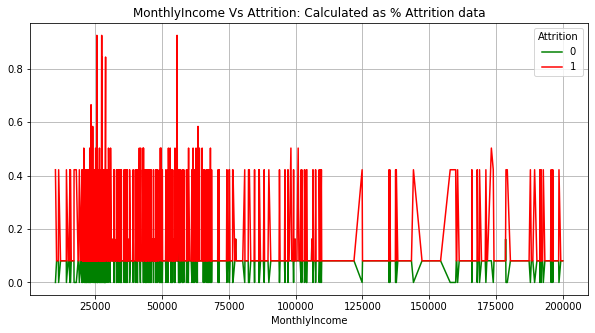

In [23]:
#Attrition rate is high for employees with monthly income between 25,000 to 60,000,This again points to the fact that it might be because
#of better career or technology options just like we saw in above EDA of marital status , as these are the younger workforce of the company.
Crosstab_Area = pd.crosstab(data.MonthlyIncome, data.Attrition,normalize = 'columns').round(90)*100
print(Crosstab_Area)
Crosstab_Area.plot(kind='line', stacked=True, color=['green','red'], grid=True,title="MonthlyIncome Vs Attrition: Calculated as % Attrition data")


# PercentSalaryHike vs Attrition

In [24]:
data.PercentSalaryHike.value_counts()

11    630
13    627
14    603
12    594
15    303
18    267
17    246
16    234
19    228
22    168
20    165
21    144
23     84
24     63
25     54
Name: PercentSalaryHike, dtype: int64

Attrition                  0          1
PercentSalaryHike                      
11                 14.598540  12.658228
12                 13.625304  12.658228
13                 14.193025  14.345992
14                 13.949716  12.236287
15                  6.488240   8.860759
16                  5.515004   4.219409
17                  5.433901   6.329114
18                  6.163828   5.485232
19                  5.028386   5.907173
20                  3.730738   3.797468
21                  3.163017   3.797468
22                  3.730738   4.219409
23                  1.865369   2.109705
24                  1.459854   1.265823
25                  1.054339   2.109705


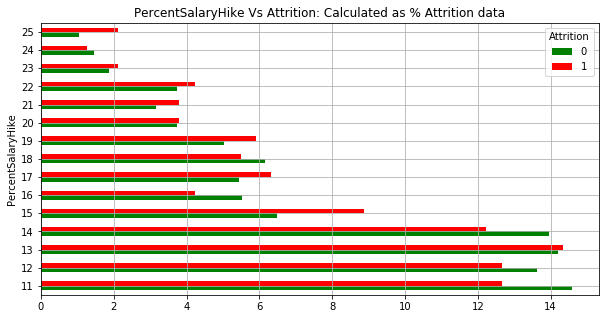

In [25]:
#Employee who got 25% Hike and 15% Hike has more Attrition % in comparision to No attrition, 15% This might be the young population of employees
#Who left the organisation for a better hike elsewhere , but the 25% hike which is the highest in the organisation also sees a greater Attrition %
#To rertain these employees Finance restructuring of the organisation might be required.

Crosstab_Area = pd.crosstab(data.PercentSalaryHike, data.Attrition,normalize = 'columns').round(20)*100
print(Crosstab_Area)
Crosstab_Area.plot(kind='barh', stacked=False, color=['green','red'], grid=True,title="PercentSalaryHike Vs Attrition: Calculated as % Attrition data")


# YearsAtCompany vs Attrition

In [26]:
data.YearsAtCompany.value_counts()

5     588
1     513
3     384
2     381
10    360
4     330
7     270
9     246
8     240
6     228
0     132
11     96
20     81
13     72
15     60
14     54
22     45
12     42
21     42
18     39
16     36
19     33
17     27
24     18
33     15
25     12
26     12
32      9
31      9
29      6
36      6
27      6
23      6
40      3
37      3
30      3
34      3
Name: YearsAtCompany, dtype: int64

Attrition               0          1
YearsAtCompany                      
0                2.270884   6.751055
1                9.083536  24.894515
2                8.110300  11.392405
3                8.759124   8.438819
4                7.380373   8.016878
5               14.193025   8.860759
6                5.433901   3.797468
7                6.407137   4.641350
8                5.758313   3.797468
9                6.001622   3.375527
10               8.272506   7.594937
11               2.433090   0.843882
12               1.135442   0.000000
13               1.784266   0.843882
14               1.297648   0.843882
15               1.540957   0.421941
16               0.892133   0.421941
17               0.648824   0.421941
18               0.973236   0.421941
19               0.811030   0.421941
20               2.108678   0.421941
21               1.054339   0.421941
22               1.135442   0.421941
23               0.081103   0.421941
24               0.405515   0.421941
2

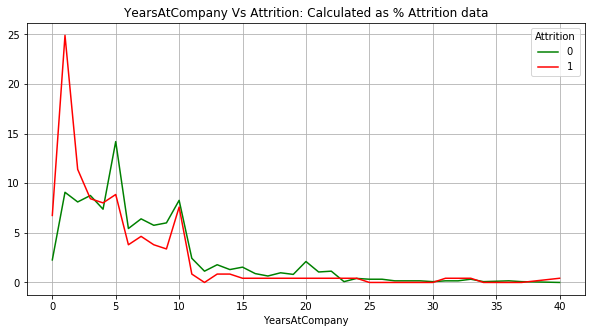

In [27]:
#The Organisation has maximum employees with 5 years of experience , with a quite huge number of employees with 1 , 2 & 3 years of experience
#Attrition rate is high with employees having years of experience between 0 to 2, This is the area the company has to majorly focus on to
#retain the employees
Crosstab_Area = pd.crosstab(data.YearsAtCompany, data.Attrition,normalize = 'columns').round(30)*100
print(Crosstab_Area)
Crosstab_Area.plot(kind='line', stacked=False, color=['green','red'], grid=True,title="YearsAtCompany Vs Attrition: Calculated as % Attrition data")


# YearsSinceLastPromotion vs Attrition

In [28]:
data.YearsSinceLastPromotion.value_counts()

0     1743
1     1071
2      477
7      228
4      183
3      156
5      135
6       96
11      72
8       54
9       51
15      39
13      30
12      30
14      27
10      18
Name: YearsSinceLastPromotion, dtype: int64

Attrition                        0          1
YearsSinceLastPromotion                      
0                        38.199513  46.413502
1                        24.979724  20.675105
2                        10.705596  11.392405
3                         3.487429   3.797468
4                         4.541768   2.109705
5                         3.487429   0.843882
6                         2.108678   2.531646
7                         4.866180   6.751055
8                         1.459854   0.000000
9                         1.054339   1.687764
10                        0.405515   0.421941
11                        1.784266   0.843882
12                        0.811030   0.000000
13                        0.648824   0.843882
14                        0.648824   0.421941
15                        0.811030   1.265823


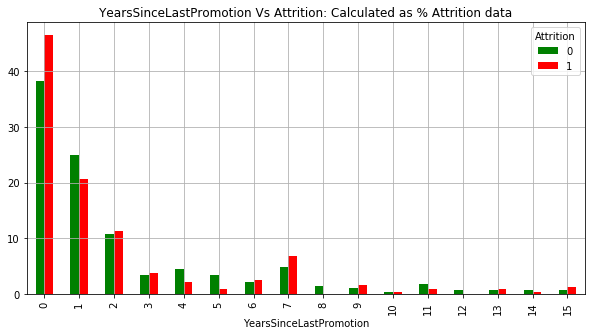

In [29]:
#Here clearly 1743 employyes didnt had any promotions and 46 % of such employees are have left/fired from the organisation.
#Promotion is definitely a major area to look after to retain the employees, Company has to reform its heirarchical policies.
Crosstab_Area = pd.crosstab(data.YearsSinceLastPromotion, data.Attrition,normalize = 'columns').round(20)*100
print(Crosstab_Area)
Crosstab_Area.plot(kind='bar', stacked=False, color=['green','red'], grid=True,title="YearsSinceLastPromotion Vs Attrition: Calculated as % Attrition data")


# YearsWithCurrManager vs Attrition

In [30]:
data.YearsWithCurrManager.value_counts()

2     1032
0      789
7      648
3      426
8      321
4      294
1      228
9      192
5       93
6       87
10      81
11      66
12      54
13      42
17      21
14      15
15      15
16       6
Name: YearsWithCurrManager, dtype: int64

Attrition                     0          1
YearsWithCurrManager                      
0                     14.436334  35.864979
1                      5.271695   4.641350
2                     23.844282  21.097046
3                      9.975669   8.016878
4                      7.055961   4.641350
5                      2.189781   1.687764
6                      2.027575   1.687764
7                     15.004055  13.080169
8                      7.866991   4.219409
9                      4.703974   2.531646
10                     1.946472   1.265823
11                     1.703163   0.421941
12                     1.459854   0.000000
13                     1.135442   0.000000
14                     0.243309   0.843882
15                     0.405515   0.000000
16                     0.162206   0.000000
17                     0.567721   0.000000


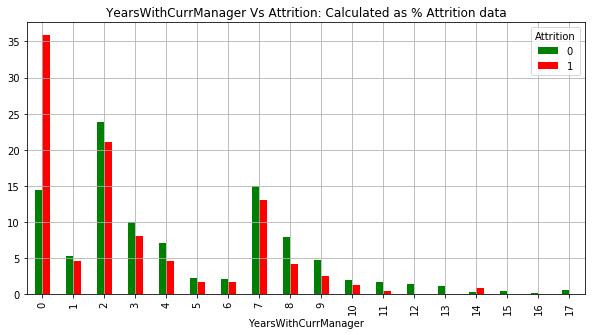

In [31]:
#Employees with 0 years with current manager left/Fired from the organisation, This gives us an insight that there was an attrition either
#when people joined the company newly or got into a new department
Crosstab_Area = pd.crosstab(data.YearsWithCurrManager, data.Attrition,normalize = 'columns').round(20)*100
print(Crosstab_Area)
Crosstab_Area.plot(kind='bar', stacked=False, color=['green','red'], grid=True,title="YearsWithCurrManager Vs Attrition: Calculated as % Attrition data")


# Department vs Attrition

In [32]:
data.Department.value_counts()

1    2883
2    1338
0     189
Name: Department, dtype: int64

Attrition           0          1
Department                      
0            3.568532   8.016878
1           65.693431  63.713080
2           30.738037  28.270042


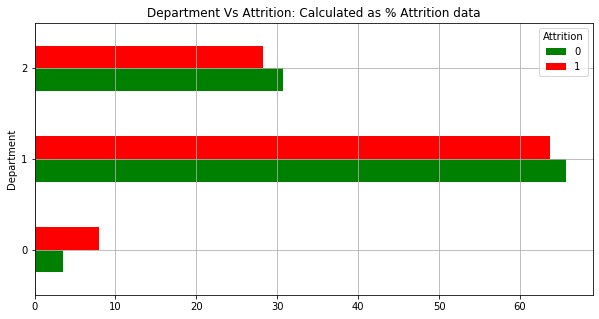

In [33]:
#Clearly HR department has seen a maximum attrition
#2- Sales , 1- Research & Development , 0 - Human Resources
Crosstab_Area = pd.crosstab(data.Department, data.Attrition,normalize = 'columns').round(20)*100
print(Crosstab_Area)
Crosstab_Area.plot(kind='barh', stacked=False, color=['green','red'], grid=True,title="Department Vs Attrition: Calculated as % Attrition data")


## Correlation

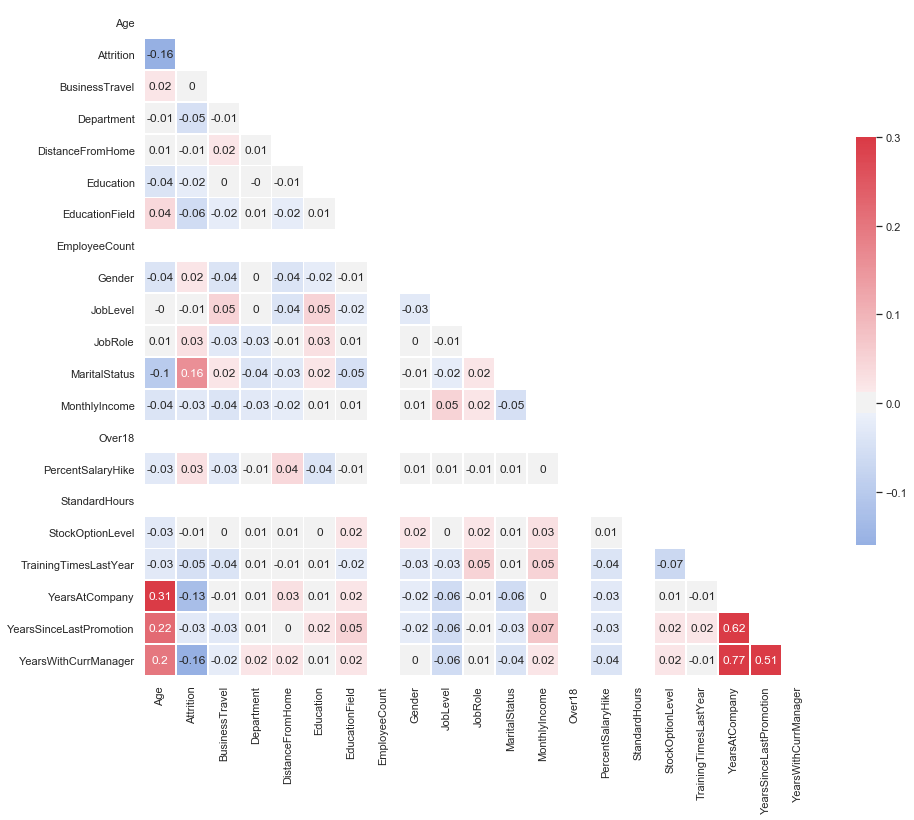

In [35]:
corr_all=data.corr().round(2)
sb.set(style="white") #masking upper triangle using (mask=mask)
mask=np.zeros_like(corr_all,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Plotting
rcParams['figure.figsize'] = 15,15
sb.heatmap(corr_all,annot = True,mask=mask,cmap = sb.diverging_palette(256, 10, as_cmap=True),vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})


Inference from the corelation matrix

1.YearsAtCompany is highly positively corelated with Age

2.YearsSinceLastPromotion and YearsWithCurrManager is also following the positively correlated pattern with age

3.YearsatCompany,YearsSinceLastPromotion and YearsWithCurrManager are having negative correlation with attrition.

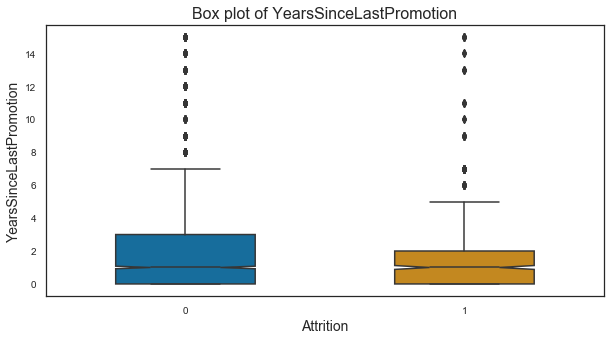

In [36]:
rcParams['figure.figsize'] =10,5

#df1.boxplot(['q_InternationalMins'],by='y_Churn',grid=True) OR

bplot = sb.boxplot(y='YearsSinceLastPromotion', x='Attrition',data=data,width=0.5,palette="colorblind",notch=True)
bplot.axes.set_title("Box plot of YearsSinceLastPromotion",fontsize=16)
bplot.set_xlabel("Attrition",fontsize=14)
bplot.set_ylabel("YearsSinceLastPromotion",fontsize=14)
bplot.tick_params(labelsize=10)


# Selection of Models 

## K-Fold Cross validaion will be used for model selection

In [37]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats

import matplotlib.pyplot as plt
import pydotplus
from matplotlib import rcParams
import seaborn as sb
import sklearn as sk
from collections import Counter

In [38]:
#Importing all classification algorithms


from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.linear_model import LinearRegression, LogisticRegression,Log,Lasso
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsClassifier,RadiusNeighborsRegressor,  NearestNeighbors, NearestCentroid
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration
from sklearn.neural_network import BernoulliRBM, MLPClassifier, MLPRegressor
from xgboost import XGBClassifier, XGBRegressor

In [39]:
CatVarList = ['Department', 'MonthlyIncome', 'YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']
ConVarList = ['Age', 'BusinessTravel', 'DistanceFromHome', 'Education',
              'EducationField', 'EmployeeCount', 'Gender',
              'JobRole', 'MaritalStatus',
              'Over18', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear']
OutValList = ['Attrition']

In [40]:
# Assign varibale and X and y
X1 = data[CatVarList]
X2 = data[ConVarList]
y1 = data[OutValList]
y2 = data[OutValList]

In [41]:
# Split
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,validation_curve,KFold
seed = 10
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state=seed, test_size=.2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X1,y1,random_state=seed, test_size=.2)


In [42]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('BB', BernoulliNB()))
models.append(('XGB_gbtree', XGBClassifier(booster='gbtree')))
models.append(('XGB_gblinear', XGBClassifier(booster='gblinear')))
models.append(('XGB_dart', XGBClassifier(booster='dart')))
models.append(('SVM', SVC()))
models.append(('ANN', MLPClassifier()))
models.append(('GBC', GradientBoostingClassifier()))

In [43]:
# evaluate each model in turn with X1, y1 based on recall

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,validation_curve,KFold

seed = 10
results = []
names = []
output = []
score = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model,np.array(X1_train),np.array(y1_train),cv=kfold,scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    output.append(msg)


print(output)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

['LR: 0.837303 (0.022909)', 'RF: 0.986393 (0.006919)', 'KNN: 0.803855 (0.023557)', 'CART: 0.980720 (0.009975)', 'NB: 0.837303 (0.022909)', 'BB: 0.829931 (0.022209)', 'XGB_gbtree: 0.934235 (0.013064)', 'XGB_gblinear: 0.837303 (0.022909)', 'XGB_dart: 0.934235 (0.013064)', 'SVM: 0.837303 (0.022909)', 'ANN: 0.700278 (0.272373)', 'GBC: 0.853744 (0.016264)']


# Clearly random forest classifier gives us a better accuracy followed by Decision Tree Classifier


### We will be using Random forest classifier and fine tune the model as  , RF classifier has a less chance of overfitting due to its randomness

In [44]:
X = data[['Department', 'MonthlyIncome', 'YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','PercentSalaryHike']]
y = data.Attrition
X.head()

,Department,MonthlyIncome,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PercentSalaryHike
0,2,131160,1,0,0,11
1,1,41890,5,1,4,23
2,1,193280,5,0,3,15
3,1,83210,8,7,5,11
4,1,23420,6,0,4,12


In [45]:
from collections import Counter
Counter(y)

Counter({0: 3699, 1: 711})

In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [47]:

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10)

In [48]:

model = RandomForestClassifier(n_estimators=15, random_state=15)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=15)

In [49]:
y_predict = model.predict(X_test)
pd.crosstab(y_test,y_predict)

col_0,0,1
Attrition,,
0,928,0
1,14,161


In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9873073436083409

# Looking at precision and Recall to understand the authenticity of the accuracy score

In [51]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test, y_predict))

0.9873073436083409
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       928
           1       1.00      0.92      0.96       175

    accuracy                           0.99      1103
   macro avg       0.99      0.96      0.98      1103
weighted avg       0.99      0.99      0.99      1103



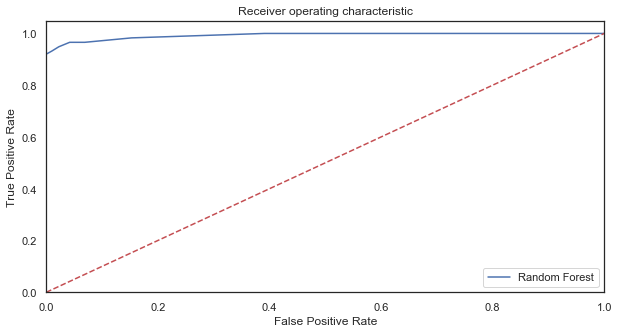

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [53]:
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
logit_roc_auc 

0.96

# Categorization of ROC _AUC Value

1. If AUROC value is from 0.9 to 1.0 = Very good
2. If AUROC value is from 0.8 to 0.9 = good
3. If AUROC value is from 0.7 to 0.8 = Fair
4. If AUROC value is from 0.6 to 0.7 = poor
5. If AUROC value is from 0.5 to 0.6 = Fail



Based on this our model falls under very good category

### Forming a better explanable confusion Matrix

In [54]:
cm = confusion_matrix(y_test, model.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()

[[928   0]
 [ 14 161]]
Model Testing Accuracy = "0.9873073436083409!"



# To check feature importance considered by model

In [55]:
importances = pd.DataFrame({'feature':data[['Department', 'MonthlyIncome', 'YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','PercentSalaryHike']].columns,'importance':np.round(model.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MonthlyIncome,0.460
PercentSalaryHike,0.171
YearsAtCompany,0.140
YearsSinceLastPromotion,0.089
YearsWithCurrManager,0.085
Department,0.054


# Conclusion :

# Company should focus at improving monthly income of employees to reduce the Attrition rate !!!

# Problem Statements

In [56]:
#Values assigned in the data set -1) 0 - Human Resources , 2- Sales , 1- Research & Development 

data.Department.value_counts()

1    2883
2    1338
0     189
Name: Department, dtype: int64

# Solution to 1st problem : 
    
## Human Resources need to maintain a sizable department as the Attrition rate is more and strength is less in comparision to other departments . Research & Development has maximum number of employees , Than the sales and HR department
    

In [57]:
data.TrainingTimesLastYear.value_counts()                              

2    1641
3    1473
4     369
5     357
1     213
6     195
0     162
Name: TrainingTimesLastYear, dtype: int64

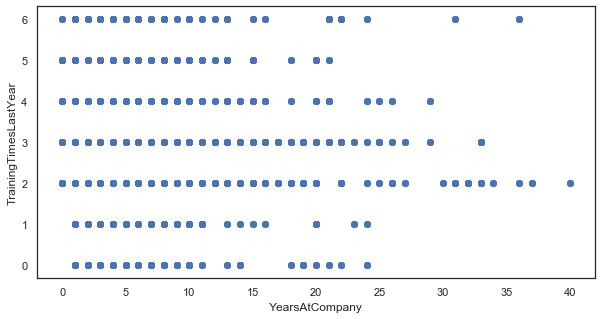

In [59]:
plt.scatter(data['YearsAtCompany'], data['TrainingTimesLastYear'])
plt.xlabel("YearsAtCompany") 
plt.ylabel("TrainingTimesLastYear") 
plt.show()

# Solution to 2nd Problem :

## New employyes are spending more time in training and as the years at the company is increasing the training time is reducing.

# Solution to 3rd and 4th Problem :

### Frequent Business Travels should be reviewed and as 29.11% of the Experience employees with high age and marital 'Status' as married have left the company.

### Employyes who fall under 15% and 25% SalaryHike category may be getting better oppurtunities outside the organisation. To retain this group of employees company has to provide a better hike.

### The Organisation has maximum employees with 5 years of experience , with a quite huge number of employees with 1 , 2 & 3        years of experience

### Attrition rate is high with employees having years of experience between 0 to 2, This is the area the company has to majorly    focus on to retain this group of employees

### Employees with 0 years with current manager left/Fired from the organisation, This gives us an insight that there was an attrition either when people joined the company newly or got into a new department
